# T1.2 Variables contínues i regla de Bayes

**Problema:** $\;$ Considereu la classificació de flors iris en setosa o no-setosa a partir de la longitud de pètals, $x$. L'estudi empíric següent mostra que les distribucions d'$x$ per a setoses i no-setoses poden aproximar-se amb distribucions normals de mitjanes i desviacions estàndard:
$$p(x\mid c=\text{set})\sim\mathcal{N}(\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)%
\qquad\text{i}\qquad%
p(x\mid c=\text{nos})\sim\mathcal{N}(\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)$$

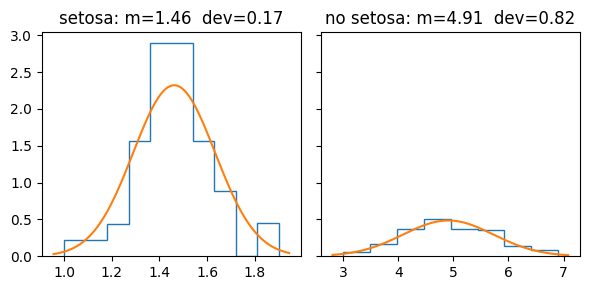

In [1]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.datasets import load_iris; from scipy.stats import norm
iris = load_iris(); X = iris.data.astype(np.float16); y = iris.target.astype(np.uint)
x_set = np.squeeze(X[np.where(y==0), 2]); x_nos = np.squeeze(X[np.where(y!=0), 2])
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True, tight_layout=True)
axs[0].hist(x_set, bins='auto', density=True, histtype='step')
x_set_range = np.arange(*axs[0].get_xlim(), .01)
x_set_mean = x_set.mean(); x_set_dev = np.sqrt(x_set.var())
axs[0].set_title(f'setosa: m={x_set_mean:.2f}  dev={x_set_dev:.2f}')
axs[0].plot(x_set_range, norm.pdf(x_set_range, x_set_mean, x_set_dev))
axs[1].hist(x_nos, bins='auto', density=True, histtype='step')
x_nos_range = np.arange(*axs[1].get_xlim(), .01)
x_nos_mean = x_nos.mean(); x_nos_dev = np.sqrt(x_nos.var())
axs[1].set_title(f'no setosa: m={x_nos_mean:.2f}  dev={x_nos_dev:.2f}')
axs[1].plot(x_nos_range, norm.pdf(x_nos_range, x_nos_mean, x_nos_dev));

Assumiu que les densitats normals estimades són certes i que la probabilitat a priori de setosa és $P(c=\text{set})=1/3$. Es demana: 
1. Calculeu la probabilitat a posteriori de que una flor de longitud de pètals $2$ siga setosa
2. Trobeu la frontera i de decisió entre setosa i no-setosa
3. Determineu les regions de decisió de les classes

**Solució:**

*Probabilitat a posteriori de que una flor de longitud de pètals $2$ siga setosa:*
$$\begin{align*}
P&(c=\text{set}\mid x=2)%
=\frac{P(c=\text{set})\,p(x=2\mid c=\text{set})}{p(x=2)}\\
&=\frac{P(c=\text{set})\,p(x=2\mid c=\text{set})}{P(c=\text{set})\,p(x=2\mid c=\text{set})+P(c=\text{nos})\,p(x=2\mid c=\text{nos})}\\
&=\frac{1/3\cdot\mathcal{N}(x=2\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)}{1/3\cdot\mathcal{N}(x=2\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)+2/3\cdot\mathcal{N}(x=2\mid\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)}\\
&=\frac{\frac{1}{0.17}\exp\left(-\frac{(2-1.46)^2}{2\cdot 0.17^2}\,\right)}{\frac{1}{0.17}\exp\left(-\frac{(2-1.46)^2}{2\cdot 0.17^2}\,\right)+\frac{2}{0.82}\exp\left(-\frac{(2-4.91)^2}{2\cdot 0.82^2}\,\right)}%
=\frac{0.0379}{0.0379+0.0045}=0.89
\end{align*}$$

*Frontera de decisió entre les classes setosa i no-setosa:*

$$\begin{gather*}
P(c=\text{set}\mid x)=P(c=\text{nos}\mid x)\\%
1/3\cdot\mathcal{N}(x\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)%
=2/3\cdot\mathcal{N}(x\mid\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)\\
\frac{1}{0.17}\exp\left(-\frac{(x-1.46)^2}{2\cdot 0.17^2}\,\right)%
=\frac{2}{0.82}\exp\left(-\frac{(x-4.91)^2}{2\cdot 0.82^2}\,\right)\\
-17.3\,(x-1.46)^2+0.74\,(x-4.91)^2+0.88=0\\
-17.3x^2+50.52x-36.88+0.74x^2-7.27x+17.84+0.88=0\\
-16.56x^2+43.25x-18.16=0\\
x=\frac{-43.25\pm\sqrt{1870.6-1202.9}}{-33.12}=\frac{-43.25\pm 25.84}{-33.12}%
=\begin{cases}0.53\\2.09\end{cases}
\end{gather*}$$

*Regions de decisió:*
* Les densitats normals es defineixen en tot $\mathbb{R}$, però només ens interessa $\mathbb{R}^+$
* La frontera trobada divideix $\mathbb{R}^+$ en tres intervals: $(0,0.53),\, (0.53, 2.09)\,$ i $\,(2.09,\infty)$
* Com que $x=2$ és setosa, $\mathcal{R}_{\text{setosa}}=(0.53, 2.09)\,$ i $\,\mathcal{R}_{\text{no-setosa}}=(0,0.53)\cup(2.09,\infty)$

Com que la distribució normal és positiva en tot $\mathbb{R}$, l'assumpció de normalitat de les densitats condicionals implica que assumim possible qualsevol longitud (positiva) de pètals, tant de setoses com de no-setoses. Òbviament, és pràcticament impossible trobar-nos setoses o no-setoses de longitud de pètals en $(0,0.53)$. Ara bé, amb l'assumpció feta, és molt improbable però no teòricament impossible. Així, com que la condicional de no-setosa és més plana que la de setosa, els càlculs indiquen que en $(0,0.53)$ és més probable que la flor siga no-setosa.

Comprovem el resultat amb gràfiques de les probabilitats a posteriori en funció d'$x$:

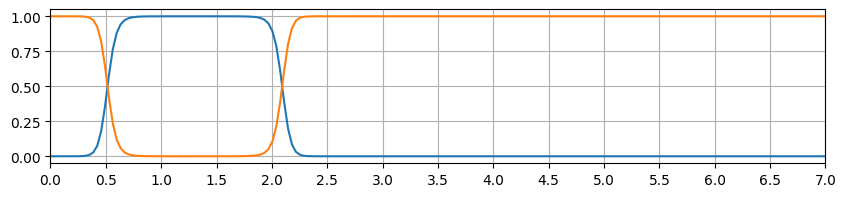

In [2]:
p_set = lambda x: norm.pdf(x, x_set_mean, x_set_dev)
p_nos = lambda x: norm.pdf(x, x_nos_mean, x_nos_dev)
P_set = lambda x: 1/3.0 * p_set(x) / (1/3.0 * p_set(x) + 2/3.0 * p_nos(x))
fig = plt.figure(figsize=(10, 2)); plt.xlim(0, 7); plt.xticks(np.arange(0, 7.1, .5)); plt.grid();
x = np.linspace(0, 7, 200); plt.plot(x, P_set(x), x, 1.0-P_set(x));